In [6]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

In [7]:
pnet = NanoEventsFactory.from_root(
    {'pnet_sig.root':"/Events"},
    delayed=False,
    schemaclass=BaseSchema,
    metadata={'dataset':'test'}
).events()

In [8]:
ecfs = ak.from_parquet('ecfs_sig.parquet')

In [9]:
pnet_scores = pnet.score_label_H_gg

In [10]:
ecf_scores = ecfs.ecf_scores

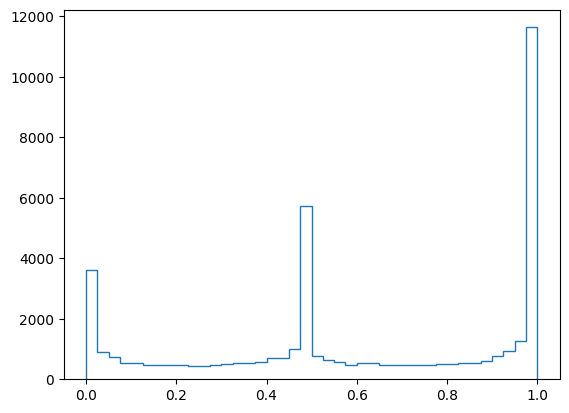

In [11]:
plt.hist(pnet_scores, bins=40, histtype='step')
plt.show()

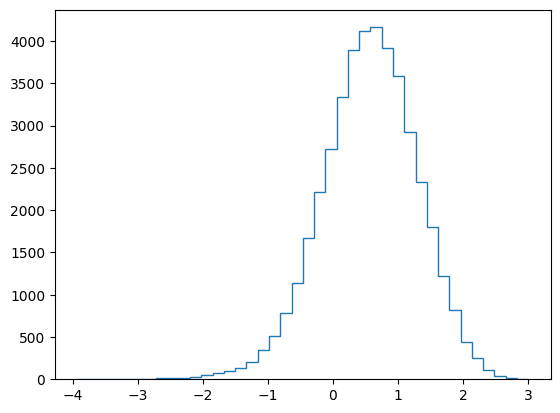

In [12]:
plt.hist(ecf_scores, bins=40, histtype='step')
plt.show()

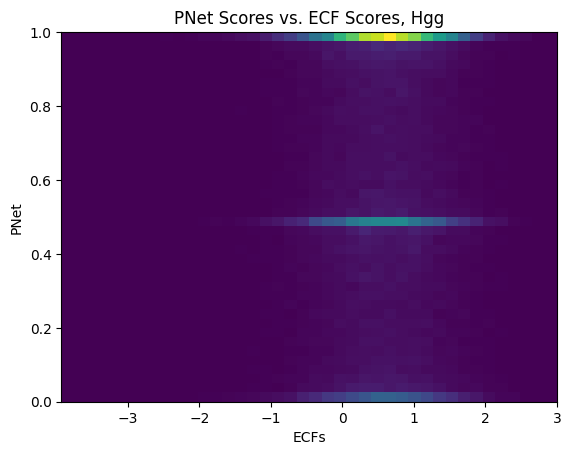

In [13]:
plt.hist2d(ecf_scores.to_numpy(), pnet_scores[:len(ecf_scores)].to_numpy(), bins=40)
plt.xlabel('ECFs')
plt.ylabel('PNet')
plt.title('PNet Scores vs. ECF Scores, Hgg')
plt.show()

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
sigmoid_ecf = sigmoid(ecf_scores)

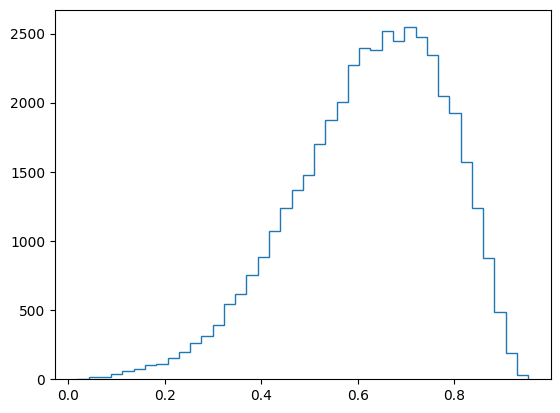

In [16]:
plt.hist(sigmoid_ecf, bins=40, histtype='step')
plt.show()

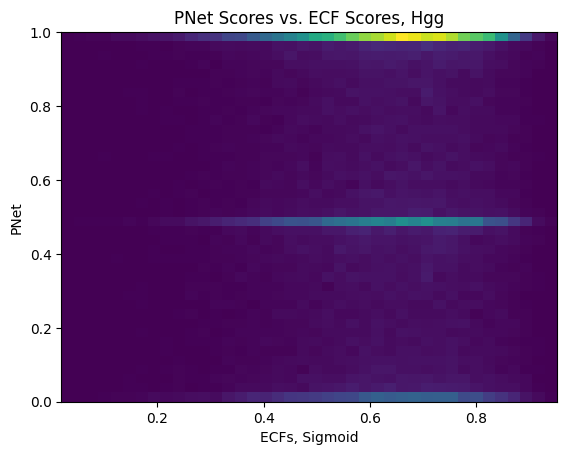

In [17]:
plt.hist2d(sigmoid_ecf.to_numpy(), pnet_scores[:len(ecf_scores)].to_numpy(), bins=40)
plt.xlabel('ECFs, Sigmoid')
plt.ylabel('PNet')
plt.title('PNet Scores vs. ECF Scores, Hgg')
plt.show()

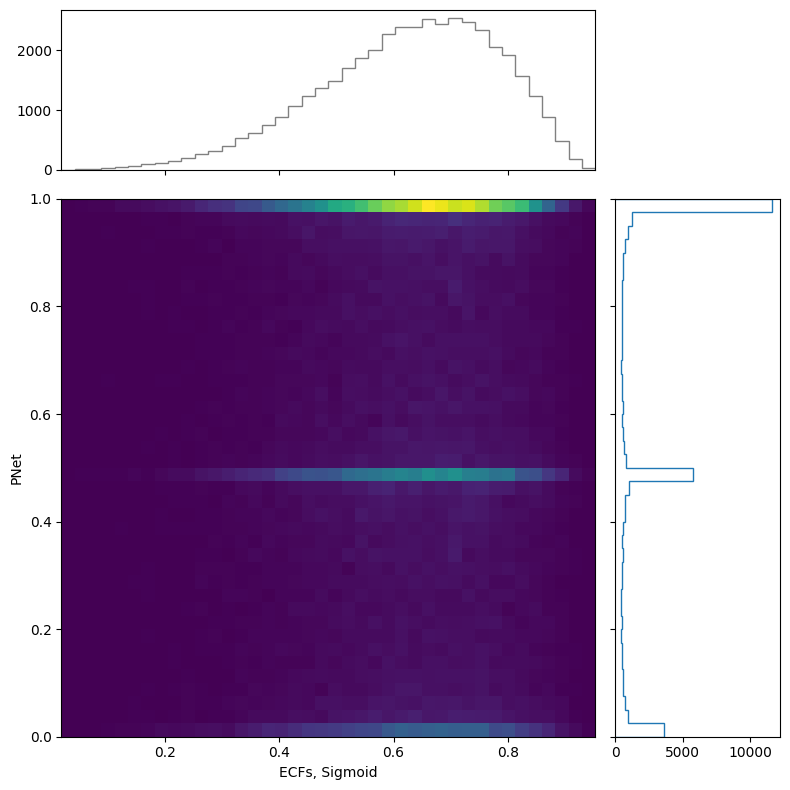

In [18]:
x = sigmoid_ecf.to_numpy()
y = pnet_scores[:len(ecf_scores)].to_numpy()

# Create the figure and gridspec layout
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(4, 4)

# Define axes
ax_main = fig.add_subplot(gs[1:4, 0:3])  # Main 2D histogram
ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_main)  # Top histogram
ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_main)  # Right histogram

# 2D histogram
h = ax_main.hist2d(x, y, bins=40)
#fig.colorbar(h[3], ax=ax_main, orientation='vertical')

# Add labels and title to the main plot
ax_main.set_xlabel('ECFs, Sigmoid')
ax_main.set_ylabel('PNet')
#ax_main.set_title('PNet Scores vs. ECF Scores, Hgg')

# Marginal histograms
ax_top.hist(x, bins=40, color='gray', histtype='step')
ax_right.hist(y, bins=40, orientation='horizontal', histtype='step')

# Clean up tick labels for shared axes
ax_top.tick_params(labelbottom=False)
ax_right.tick_params(labelleft=False)

# Adjust spacing
fig.tight_layout()
plt.show()